# 전이학습(Transfer Learning)
- 한 분야에서 학습된 모델의 지식을 새로운 과제에 적용하는 방법
- 다른 Task 에서 대량의 데이터로 학습된 모델의 가중치를 활용하여 비슷한 다른 Task에 적용하여 모델 성능을 향상시키는 학습 방법
- Pre-training
    - Pre-training(사전학습)이란 모델을 바로 주어진 문제에 학습시키기 이전에 아주 많은 데이터셋으로 먼저 학습을 시키는 것을 말함
    - 사전 학습된 모델의 parameter를 이용해서 모델을 initialize한 뒤, 실제 풀려고 하는 문제의 데이터로 학습을 하게 되면 임의로 initialize된 parameter를 가진 모델을 처음부터 학습시키는 것 보다 더 높은 성능을 보여줌

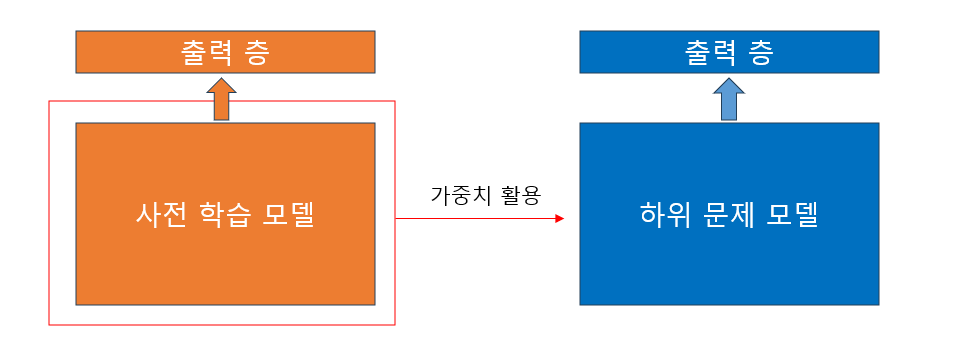

- 장점
    - 적은 데이터로도 좋은 성능을 얻을 수 있음
    - 훈련 시간이 짧아지며, 과대적합(overfitting)을 방지하는 데 유리
- 단점
    - 사전 학습된 모델과 새로운 과제의 차이가 큰 경우 효과가 없을 수 있음

## 일반적으로 합성곱 신경망 기반 모델들은 두가지 파트로 구성
- Feature extractor
    - 합성곱층과 풀링층으로 구성
- Classifier
    - 주로 Fully-Connected Layer로 구성


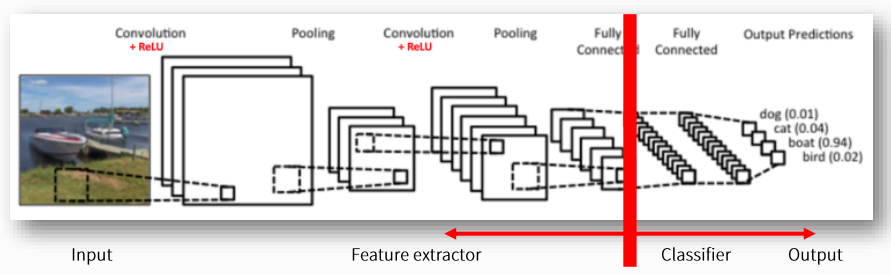

## 합성곱 신경망 학습의 특징
- input에 가까운 부분은 일반적인 특징을 추출하도록 학습된다.
- output에 가까워질수록 특정 문제 혹은 데이터셋에서만 나타나는 구체적인 특징을 추출하도록 학습된다.


## 미세 조정(Fine-tuning)
- 딥 러닝에서 미세조정은 사전 훈련된 모델의 가중치가 새로운 데이터에 대해 훈련되는 전이 학습에 대한 접근 방식
- 사전학습된 모델에 추가로 개별과제에 맞는 새로운 레이어를 추가하여 이미 학습된 모델의 가중치 전체 또는 일부를 미세하게 조정하는 학습 방법


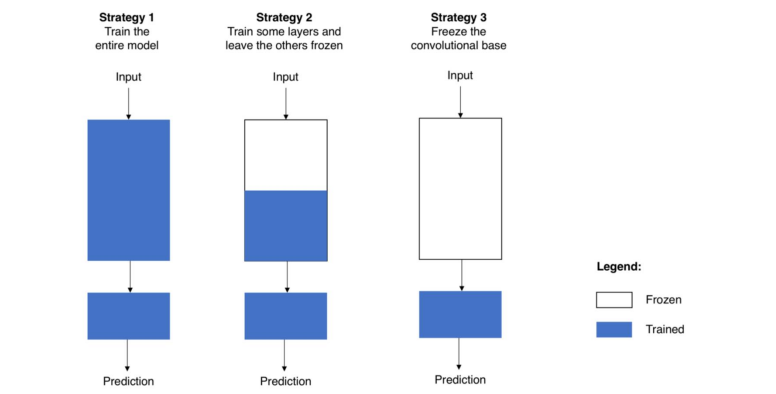

## Fine tuning 전략
1. 새로운 데이터셋이 크고, 유사성이 작음
  - Pre-trained Model 전체를 학습
  > 데이터셋의 크기가 충분히 크기 때문에 학습에 유리하며, 유사성이 낮더라도 모델의 구조와 파라미터를 재사용할 수 있다. 따라서 전체 모델을 학습시키는 것이 더 적합하다.
2. 새로운 데이터셋이 크고, 유사성이 큼
  - Pre-trained Model의 일부분과 Classifier를 학습
  > 최적의 경우이기 때문에 모든 옵션을 선택할 수 있지만, 데이터셋이 유사하기 때문에 전체를 학습시켜도 괜찮지만, 강한 feature가 나타나는 Pre-trained Model의 뒷부분과 Classifier만 새로 학습시키는 것이 최적이다.
3. 새로운 데이터셋이 작고, 유사성이 작음
  - Pre-trained Model의 일부분과 Classifier를 학습  
  > 가장 나쁜 상황으로 데이터가 적기 때문에 적은 레이어를 Fine tuning하면 별 효과가 없고, 많은 레이어를 Fine tuning했다가는 오히려 오버피팅이 발생할 것이다. 따라서 Pre-trained Model의 어느 정도를 새로 학습시켜야 할지를 적당히 잡아주어야 한다.
4. 새로운 데이터셋이 작고, 유사성이 큼
  - Classifier만 학습시킨다.    
  > 데이터가 적기 때문에 많은 레이어를 Fine tuning할 경우 오버피팅이 발생한다. 따라서 앞부분의 Feature Extraction은 그대로 쓰고, 최종 Classifier의 FC Layer들에 대해서만 Fine tuning을 진행한다.

## VGG
- 옥스포트 대학의 연구팀 VGG(Visual Geometry Group)에 의해 개발된 모델로써, 2014년 이미지넷 이미지 인식 대회에서 준우승을 한 모델  
- 1등을 한 GoogleNet보다 단순하면서 성능은 거의 차이가 나지 않은 VGG가 주목을 많이 받았음


### VGG 모델의 주요 특징
- 단순하고 균일한 구조
    - 모든 합성곱 레이어는 3x3 필터를 사용하며, 이를 여러 층에 걸쳐 쌓아 복잡한 특성을 학습
    - 모든 풀링 레이어는 2x2 크기와 스트라이드 2를 사용하여, 이미지 크기를 절반으로 줄임
- 깊은 네트워크 구조
    - VGG는 층의 수가 많고, 그 깊이를 통해 추상화된 고차원 특징을 효과적으로 학습
    - 이 깊이를 통해 모델은 더 복잡하고 구체적인 패턴을 학습할 수 있어, 이미지 분류 성능이 향상
- 일관된 합성곱과 풀링 구조
    - VGG의 모든 합성곱 레이어는 3x3 필터를 사용하며, ReLU 활성화 함수를 적용
    - 균일한 구조는 모델이 일정한 수의 파라미터를 가질 수 있도록 하여, 다른 모델에 비해 계산 효율성이 높음

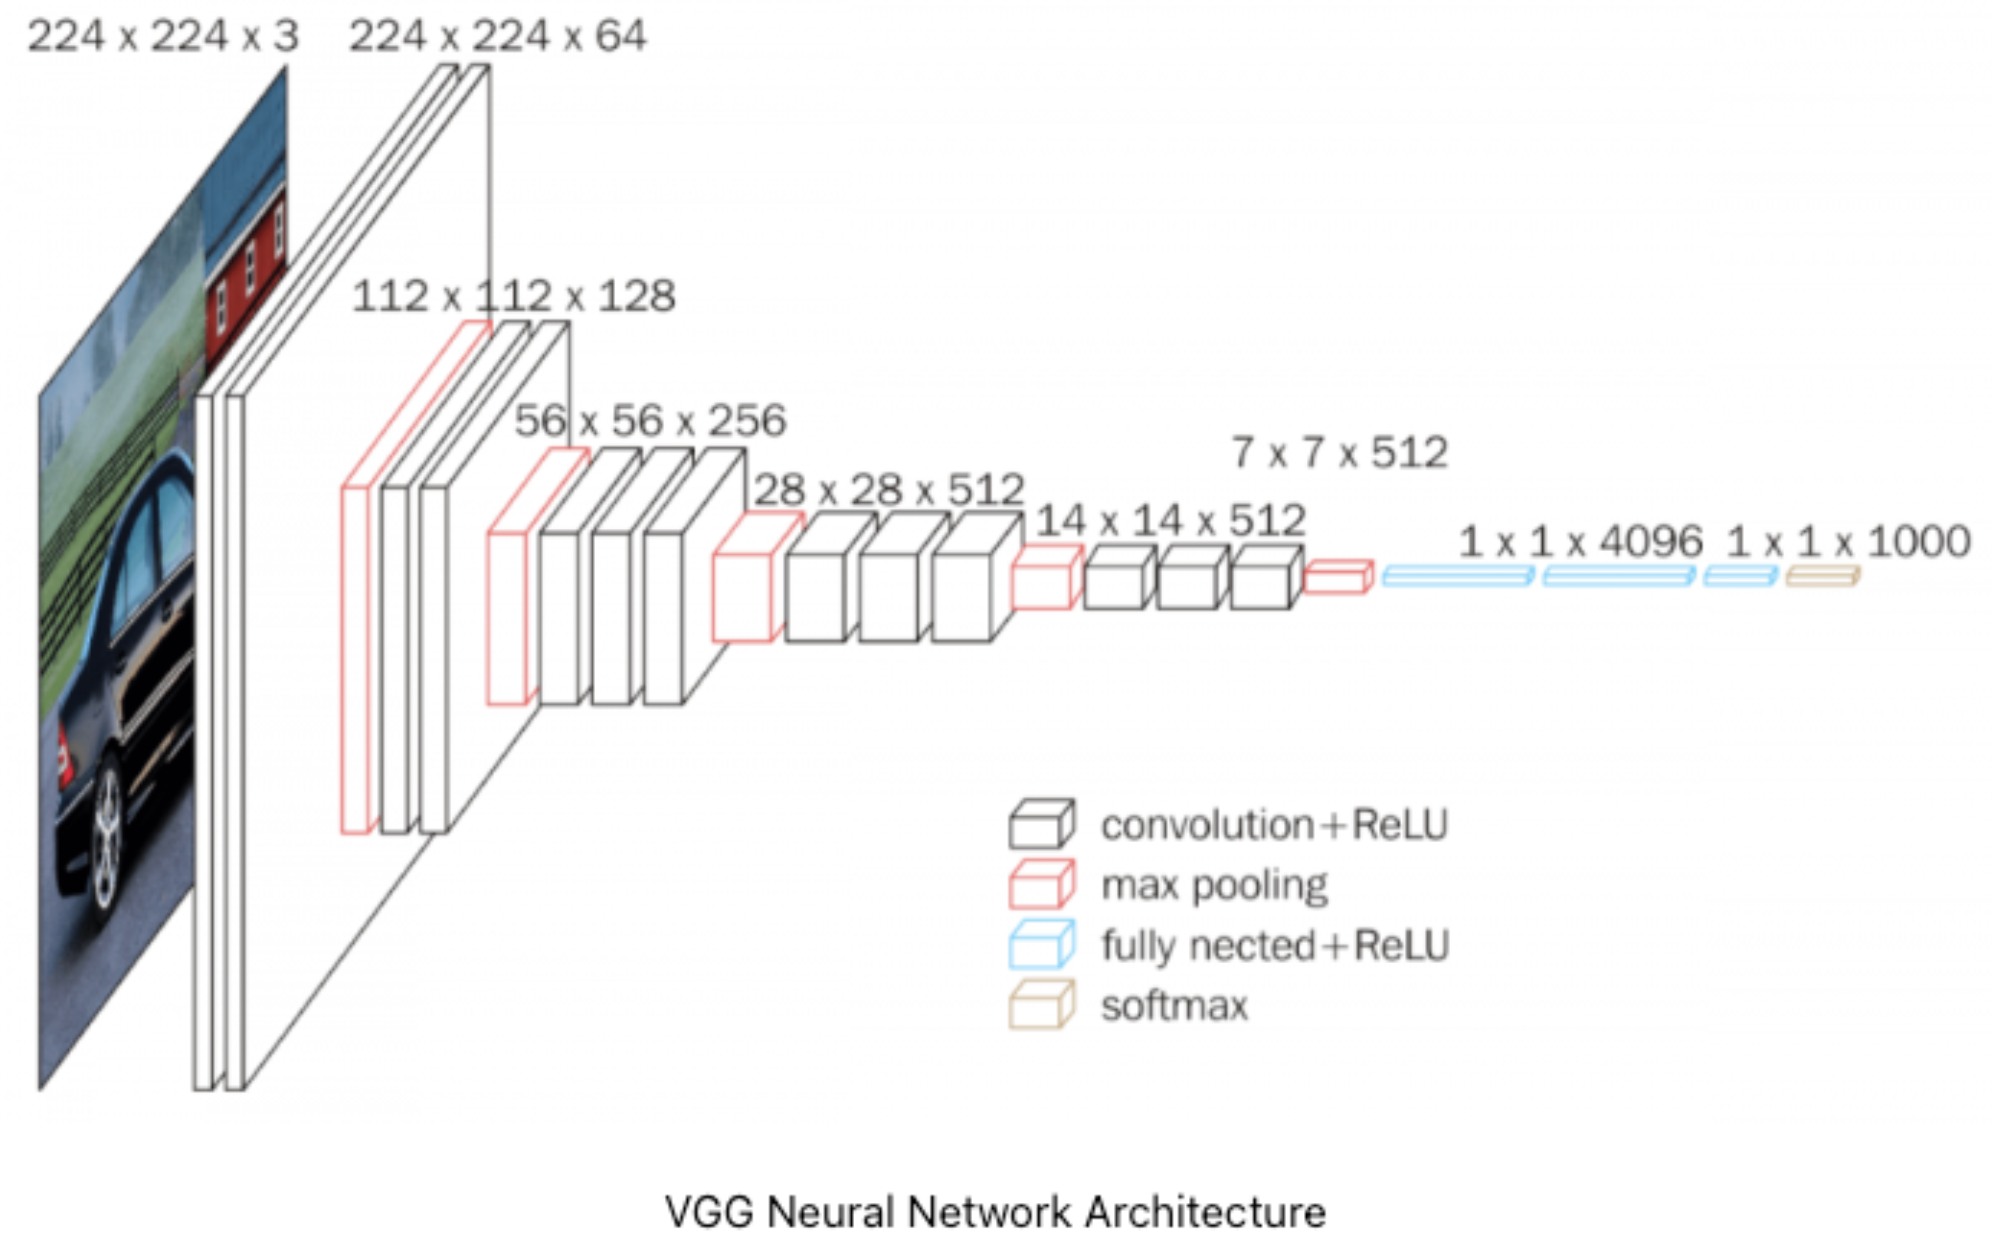

## ResNet
- Residual neural network의 줄임말로 마이크로소프트에서 개발한 알고리즘으로써 2015년 이미지넷 이미지 인식 대회에서 우승을 한 모델
- ResNet의 가장 큰 특징은 잔차 연결(Residual Connection)을 도입
    - Skip Connection
    - 깊은 네트워크에서 발생하는 기울기 소실(vanishing gradient) 문제를 해결하고, 더 깊은 신경망을 효율적으로 학습


### 잔차 연결(Residual Connection)
- 잔차 블록은 출력이 입력을 그대로 "Skip"해서 더해지는 방식으로 구성
- 신경망이 "Skip" 경로를 통해 기울기가 전달될 수 있게 하여 기울기 소실 문제를 방지

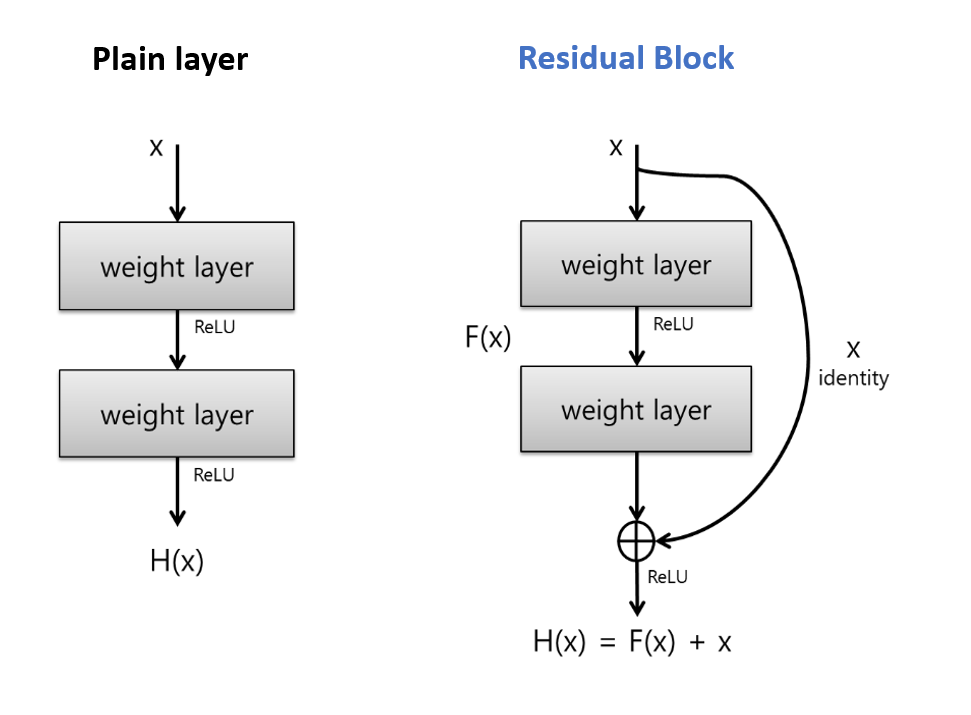

### Bottleneck 구조
- 1x1 합성곱
    - 첫 번째 층에서 1x1 합성곱을 통해 채널 수를 줄여 연산량을 줄임
- 3x3 합성곱
    - 두 번째 층에서 3x3 합성곱을 수행하여 주요 특징을 학습
- 1x1 합성곱
    - 1x1 합성곱을 다시 사용하여 채널 수를 원래대로 확장

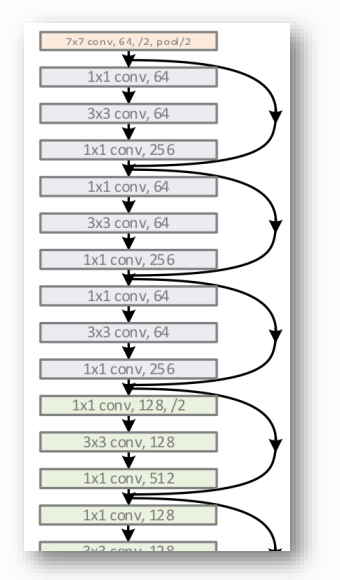

## EfficientNet
- EfficientNet은 Google Brain 팀에서 개발한 딥러닝 모델로, 이미지 분류와 같은 비전 과제에서 높은 효율성과 성능을 자랑하는 CNN 아키텍처
- 주어진 연산량 안에서 정확도를 최대화하는 것을 목표로 설계되었으며, 모델을 깊이, 너비, 해상도로 동시에 확장하는 방식으로 효율성을 높였음
- 성능과 효율성을 극대화하기 위해 Compound Scaling을 통해 모델의 깊이, 너비, 해상도를 균형 있게 확장한 것이 특징
- EfficientNet은 작은 버전부터 큰 버전까지 총 8가지 모델인 EfficientNet-B0에서 EfficientNet-B7로 구성되어 있으며, 각 모델은 연산량과 파라미터 수가 점진적으로 증가하면서 성능도 개선


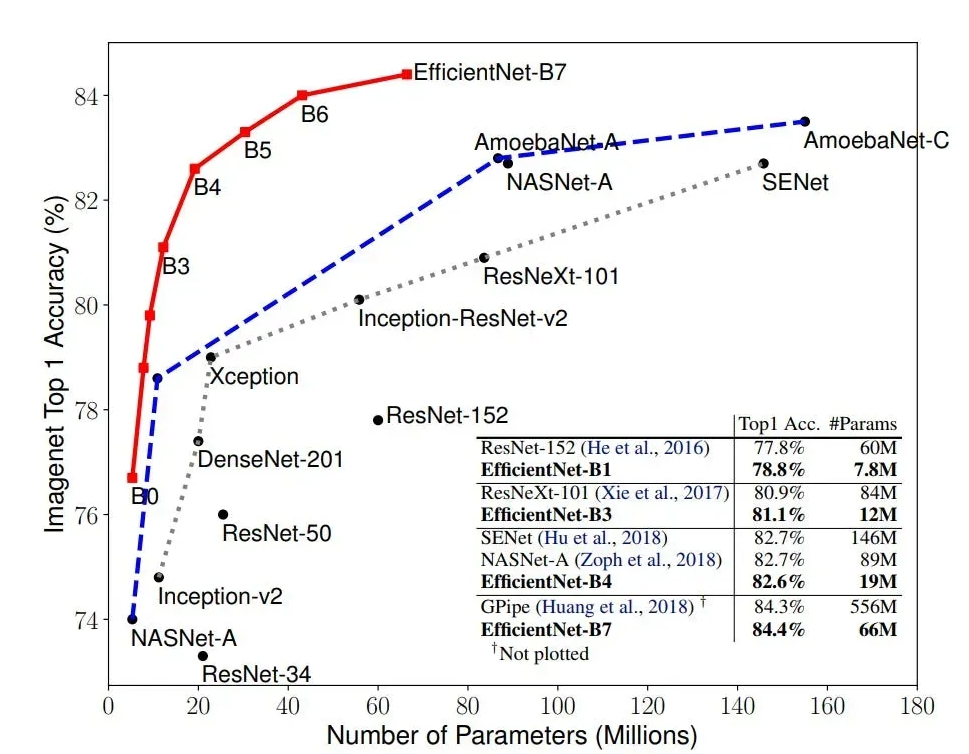

### Compound Scaling
- EfficientNet 모델에서 사용된 확장 방법으로, 모델의 성능을 높이기 위해 모델의 세 가지 주요 요소(너비, 깊이, 해상도)를 균형 있게 확장하는 방법
- Compound Scaling에서는 다음의 세 가지 요소를 균형 있게 동시에 확장
- 너비(Width) 확장
> 신경망의 너비는 각 층의 채널 수를 늘려, 동시에 더 많은 특성 맵을 학습할 수 있도록 한다.
- 깊이(Depth) 확장
> 깊이는 네트워크의 층 수를 늘려, 모델이 더 복잡한 패턴을 학습할 수 있게 한다.
- 해상도(Resolution) 확장
> 입력 이미지의 해상도를 높여 더 많은 세부 정보를 보존하고 학습할 수 있게 한다.

### SE(Squeeze-and-Excitation) 블록
- SE 블록은 채널 간의 상호작용을 학습해, 어떤 채널이 더 중요한지 학습하는 과정에서 각 채널에 가중치를 할당
- SE 블록은 각 채널의 중요도를 계산할 때, 채널별 가중치를 0과 1 사이로 정규화하기 위해 sigmoid 함수를 사용
- 정규화된 가중치는 각 채널에 곱해져, 모델이 특정 채널에 더 집중할 수 있도록 도와줌

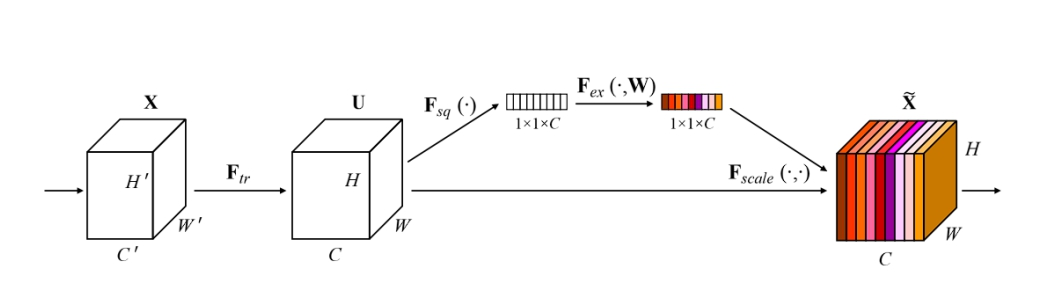

### SiLU(Swish) 활성화 함수
- ReLU와 달리 매끄러운 연속 함수
- Swish는 소수의 음수를 전파할 수 있는 반면, ReLU는 모든 음수를 0으로 임계값을 설정
$$
\text{silu}(x) = x * \sigma(x)
$$

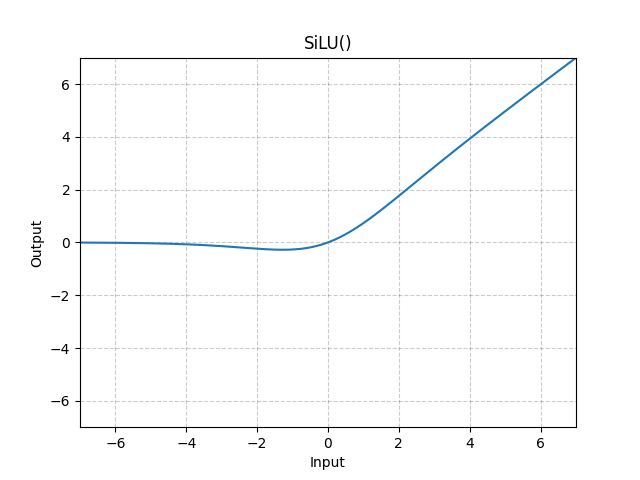

In [13]:
!gdown 1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga
!unzip -oqq cats_and_dogs.zip

Downloading...
From (original): https://drive.google.com/uc?id=1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga
From (redirected): https://drive.google.com/uc?id=1jo-u_wLMZbk6VexNC2mpWMDkOqLxyaga&confirm=t&uuid=28c30bf4-7093-421f-91f6-cf64dc0a3301
To: /content/cats_and_dogs.zip
100% 90.8M/90.8M [00:00<00:00, 117MB/s]


In [14]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [15]:
SEED = 42
device = "cuda" if torch.cuda.is_available() else "cpu"

- 고양이: 0
- 개: 1

In [16]:
from glob import glob

train_path = sorted(glob("train/cats/*.jpg") + glob("train/dogs/*.jpg"))
test_path = sorted(glob("test/cats/*.jpg") + glob("test/dogs/*.jpg"))

train_path = np.array(train_path)
test_path = np.array(test_path)

train_path.shape, test_path.shape

((2000,), (2000,))

In [17]:
train_target = np.array([0] * 1000 + [1] * 1000).reshape(-1, 1)
test_target = np.array([0] * 1000 + [1] * 1000).reshape(-1, 1)

train_target.shape, test_target.shape

((2000, 1), (2000, 1))

In [18]:
np.random.seed(SEED)
idx = np.arange(train_path.shape[0])

np.random.shuffle(idx)
np.random.shuffle(idx)

train_path = train_path[idx]
train_target = train_target[idx]

In [19]:
# from torchvision.models import resnet50
# model = resnet50(pretrained=True)

# 사전학습 모델 로딩
- 사전학습 모델 객체를 반환할 수 있는 함수와 사전학습 모델의 가중치를 가지고 있는 클래스를 import 해야 함
- https://pytorch.org/vision/stable/models.html#table-of-all-available-classification-weights

In [20]:
from torchvision.models import resnet50, ResNet50_Weights

In [21]:
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

- 사전학습 모델에서 사용한 이미지 전처리 방식을 그대로 사용

In [22]:
weights = ResNet50_Weights.IMAGENET1K_V2
preprocess = weights.transforms()

In [23]:
from PIL import Image

In [24]:
img = Image.open(train_path[0])
preprocess(img)

tensor([[[2.2489, 2.2489, 2.2489,  ..., 2.1290, 2.2318, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.1290, 2.2318, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.1804, 2.2318, 2.2489],
         ...,
         [2.2489, 2.2489, 2.2489,  ..., 2.2147, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2147, 2.2489, 2.2489],
         [2.2489, 2.2489, 2.2489,  ..., 2.2147, 2.2489, 2.2489]],

        [[2.4286, 2.4286, 2.4286,  ..., 2.4111, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.3761, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.2885, 2.4111, 2.4286],
         ...,
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286],
         [2.4286, 2.4286, 2.4286,  ..., 2.4286, 2.4286, 2.4286]],

        [[2.6400, 2.6400, 2.6400,  ..., 2.4831, 2.5877, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.4483, 2.5877, 2.6400],
         [2.6400, 2.6400, 2.6400,  ..., 2.4831, 2.5877, 2.

- 사전학습 모델 조회

In [25]:
from torchvision.models import list_models

list_models()[:5]

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny']

- get_model 함수를 이용해서 사전학습 모델 불러오기

In [26]:
from torchvision.models import get_model

model = get_model("EfficientNet_B0", weights="DEFAULT")
model

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 69.1MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

# 데이터셋 클래스

In [27]:
from torchvision import transforms

resize = [224, 224]
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]

train_list = [
    # 여기에 증강 관련 변환 적용
    transforms.Resize(resize),
    # 여기에 증강 관련 변환 적용
    transforms.ToTensor(), # MinMax + Channel, Height, Width + Tensor 변환
    transforms.Normalize(means, stds)
]

train_transform = transforms.Compose(train_list)

test_list = [
    transforms.Resize(resize),
    transforms.ToTensor(), # MinMax + Channel, Height, Width + Tensor 변환
    transforms.Normalize(means, stds)
]

test_transform = transforms.Compose(test_list)

In [28]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, transform, x, y=None):
        self.transform, self.x, self.y = transform, x, y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self, i):
        item = {}
        x = Image.open(self.x[i])
        item["x"] = self.transform(x)

        if self.y is not None:
            item["y"] = torch.Tensor(self.y[i])

        return item

In [29]:
dataset = CatDogDataset(train_transform, train_path, train_target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=False)
batch = next(iter(dataloader))
batch["x"].shape

torch.Size([2, 3, 224, 224])

# 동결(Freezing)

## 특성을 추출하는 부분 모두 동결

In [31]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)

In [38]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet50(weights=ResNet50_Weights.DEFAULT)
        for param in self.model.parameters():
            param.requires_grad = False

        self.model.fc = torch.nn.Linear(2048, 1)

    def forward(self, x):
        return self.model(x)

In [45]:
model = Net()
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.conv1.weight False
model.bn1.weight False
model.bn1.bias False
model.layer1.0.conv1.weight False
model.layer1.0.bn1.weight False
model.layer1.0.bn1.bias False
model.layer1.0.conv2.weight False
model.layer1.0.bn2.weight False
model.layer1.0.bn2.bias False
model.layer1.0.conv3.weight False
model.layer1.0.bn3.weight False
model.layer1.0.bn3.bias False
model.layer1.0.downsample.0.weight False
model.layer1.0.downsample.1.weight False
model.layer1.0.downsample.1.bias False
model.layer1.1.conv1.weight False
model.layer1.1.bn1.weight False
model.layer1.1.bn1.bias False
model.layer1.1.conv2.weight False
model.layer1.1.bn2.weight False
model.layer1.1.bn2.bias False
model.layer1.1.conv3.weight False
model.layer1.1.bn3.weight False
model.layer1.1.bn3.bias False
model.layer1.2.conv1.weight False
model.layer1.2.bn1.weight False
model.layer1.2.bn1.bias False
model.layer1.2.conv2.weight False
model.layer1.2.bn2.weight False
model.layer1.2.bn2.bias False
model.layer1.2.conv3.weight False
model.la

## 일부 동결

In [53]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet50(weights=ResNet50_Weights.DEFAULT)
        for name, param in self.model.named_parameters():
            if name.startswith("layer3"):
                break
            param.requires_grad = False

        self.model.fc = torch.nn.Linear(2048, 1)

    def forward(self, x):
        return self.model(x)

In [51]:
model = resnet50(weights=ResNet50_Weights.DEFAULT)
for name, param in model.named_parameters():
    if name.startswith("layer3"):
        break
    param.requires_grad = False

In [52]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.0.conv3.weight False
layer1.0.bn3.weight False
layer1.0.bn3.bias False
layer1.0.downsample.0.weight False
layer1.0.downsample.1.weight False
layer1.0.downsample.1.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.1.conv3.weight False
layer1.1.bn3.weight False
layer1.1.bn3.bias False
layer1.2.conv1.weight False
layer1.2.bn1.weight False
layer1.2.bn1.bias False
layer1.2.conv2.weight False
layer1.2.bn2.weight False
layer1.2.bn2.bias False
layer1.2.conv3.weight False
layer1.2.bn3.weight False
layer1.2.bn3.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2

# 모델 클래스

In [57]:
# class Net(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.pre_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
#         self.output_layer = torch.nn.Linear(1000, 1)

#     def forward(self, x):
#         return self.output_layer(self.pre_model(x))

In [58]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.pre_model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        self.pre_model.fc = torch.nn.Linear(2048, 1)

    def forward(self, x):
        return self.pre_model(x)

In [59]:
Net()(batch["x"])

tensor([[-0.1050],
        [-0.1058]], grad_fn=<AddmmBackward0>)

# 학습 루프

In [60]:
def train_loop(dataloader, model, loss_function, optimizer, device):
    epoch_loss = 0
    model.train()

    for batch in dataloader:
        pred = model(batch["x"].to(device))
        loss = loss_function(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

# 테스트 루프

In [61]:
@torch.no_grad()
def test_loop(dataloader, model, loss_function, device):
    epoch_loss = 0
    model.eval()

    act = torch.nn.Sigmoid()
    pred_list = []
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        if batch.get("y") is not None:
            loss = loss_function(pred, batch["y"].to(device))
            epoch_loss += loss.item()

        pred = act(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    pred = np.concatenate(pred_list)
    epoch_loss /= len(dataloader)

    return epoch_loss, pred

# 하이퍼파라미터

In [62]:
batch_size = 32
loss_function = torch.nn.BCEWithLogitsLoss()
epochs = 100
n_splits = 5 # KFold의 K값

In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

cv = KFold(n_splits, shuffle=True, random_state=SEED)

In [72]:
is_holdout = False
reset_seeds(SEED)
score_list = []

for i, (tri, vai) in enumerate(cv.split(train_path)):
    # 학습 데이터
    train_dataset = CatDogDataset(train_transform, train_path[tri], train_target[tri])
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 검증 데이터
    valid_dataset = CatDogDataset(test_transform, train_path[vai], train_target[vai])
    valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    # 모델 객체 및 옵티마이저 생성
    model = Net().to(device)
    optimizer = torch.optim.Adam(model.parameters())

    patience = 0 # 조기 종료 조건을 주기 위한 변수
    best_score = 0 # 현재 최고 점수 / mse, mae 등은 np.inf
    for _ in tqdm(range(epochs)):
        train_loss = train_loop(train_dataloader, model, loss_function, optimizer, device)
        valid_loss, pred = test_loop(valid_dataloader, model, loss_function, device)
        pred = (pred > 0.5).astype(int)
        score = accuracy_score(train_target[vai], pred)
        patience += 1

        if score > best_score:
            best_score = score
            patience = 0
            torch.save(model.state_dict(), f"model{i}.pt")

        if patience == 5:
            break

    score_list.append(best_score)
    print(f"ACC 최고점수: {best_score}")

    if is_holdout:
        break

  0%|          | 0/100 [00:00<?, ?it/s]

ACC 최고점수: 0.94


  0%|          | 0/100 [00:00<?, ?it/s]

ACC 최고점수: 0.925


  0%|          | 0/100 [00:00<?, ?it/s]

ACC 최고점수: 0.945


  0%|          | 0/100 [00:00<?, ?it/s]

ACC 최고점수: 0.9425


  0%|          | 0/100 [00:00<?, ?it/s]

ACC 최고점수: 0.945


# 테스트 평가

In [73]:
test_dataset = CatDogDataset(test_transform, test_path)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [74]:
pred_list = []

for i in range(n_splits):
    model = Net().to(device)
    state_dict = torch.load(f"model{i}.pt", weights_only=True)
    model.load_state_dict(state_dict)

    _, pred = test_loop(test_dataloader, model, None, device)
    pred_list.append(pred)

In [75]:
pred = np.mean(pred_list, axis=0)
pred = (pred > 0.5).astype(int)
pred.shape

(2000, 1)

In [76]:
accuracy_score(test_target, pred)

0.957